In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data

In [12]:
prod_input = pd.read_csv("../data/generation.csv")
cons_m_input = pd.read_csv("../data/consumption_monthly.csv")
cons_q_input = pd.read_csv("../data/consumption_quarterly.csv")

In [13]:
cons_m_filtered = cons_m_input[cons_m_input.year >= 2013]
cons_q_filtered = cons_q_input[cons_q_input.year >= 2013]
prod_filtered = prod_input[prod_input.year >= 2013]

# Correlation between month and demand

There seems to be a correlation between the consumption of electricity and the month of the year. Even though some outliers are found specially in the winter months (likely because of more uncertain conditions under this period), the distribution shows a relationship between the demand and the month of the year. March appears as the only month not following the general trend (https://en.wikipedia.org/wiki/Climate_of_the_United_Kingdom). Data from 2010.

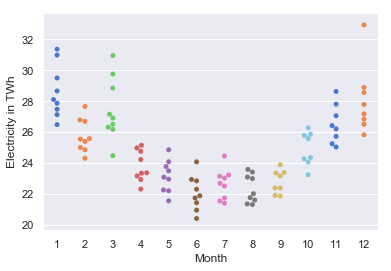

In [11]:
ax = sns.swarmplot(x="month", y="pds_setc_total", data=cons_m_input, palette="muted")
ax.set(xlabel='Month', ylabel='Electricity in TWh')
plt.show()

# Country analysys through the year
Doensn't show anything :(

Text(0,0.5,'Electricity in TWh')

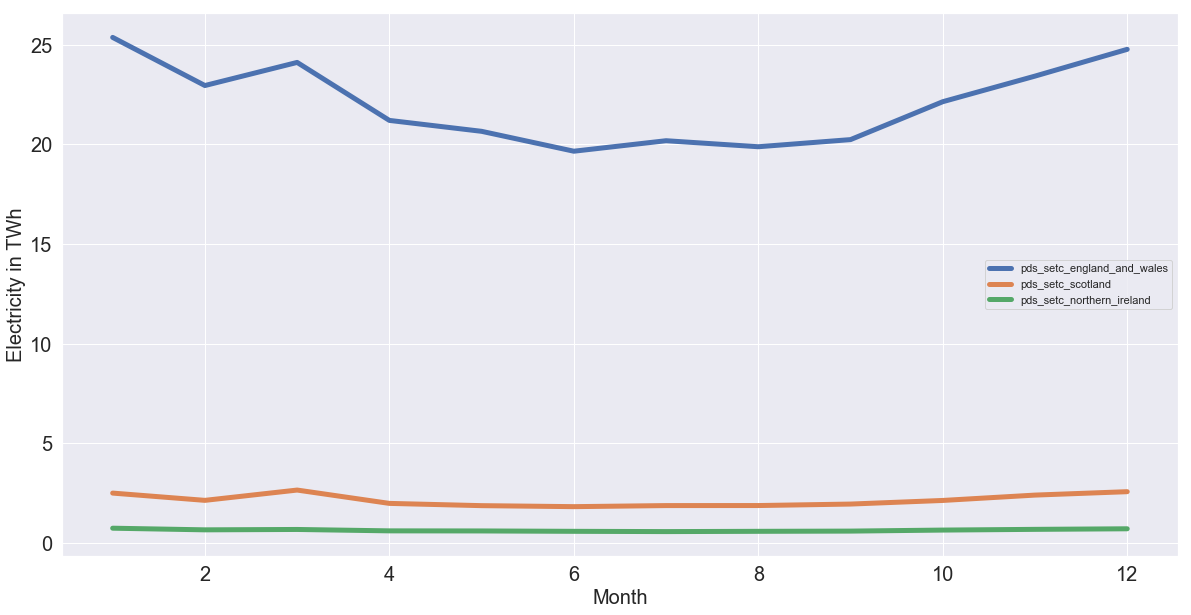

In [12]:
sns.set()
cons_m_input_grouped = cons_m_input[['month', 'pds_setc_england_and_wales', 'pds_setc_scotland', 'pds_setc_northern_ireland']].groupby('month').agg('mean')

cons_m_input_grouped.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Electricity in TWh', fontsize = 20)

# Consumption trend
An interesting insight from this plot is that, although it's known that the electricity consumption is correlated with many environmental factor (e.g. the weather), there seems to be a trend that has brought the consumption of electricity to fall in the past 5 years. N.b. observations for 2018 end in August.

([<matplotlib.axis.XTick at 0x1a1e5d15f8>,
 <a list of 12 Text xticklabel objects>)

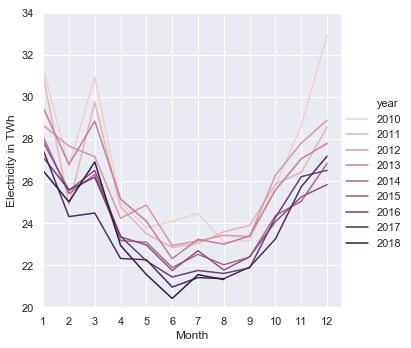

In [13]:
ax = sns.relplot(x="month", y="pds_setc_total", hue="year", kind="line", data=cons_m_input, legend="full")
ax.set(xlabel='Month', ylabel='Electricity in TWh')
plt.ylim(20, 34)
plt.xlim(1, None)
plt.xticks(range(1, 13))

# Analyse the quarterly production
A first analysis of the production of electricity by renewables shows that it follows a similar trend with the demand. It is high in Q1 and Q4 (winter months) and falls in Q2 and Q3. Moreover, as expected, is observed that the production of electricity has increased over all the quarters in the last 5 years. An in-depth analysis of the different types of renewable sources tells us which is the most affected from the change of season. While the generation of bioenergy seems not to influence from the period, on the other hand, off-shore wind & solar and hydro present a big decrease. On-shore wind and solar, probably unbiased because of a combined variable, only lightly drops in Q3.

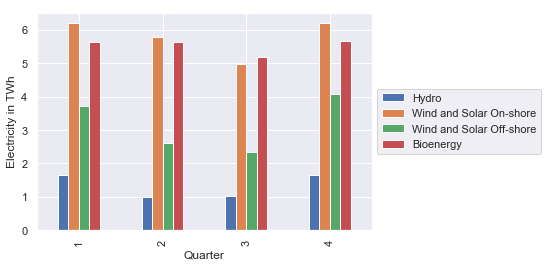

In [14]:
sns.set()
prod_input_grouped = prod_input[['quarter', 'generated_hydro', 'generated_wind_solar_onshore', 'generated_of_which_offshore', 'generated_bioenergy']].groupby('quarter').agg('mean')
prod_input_grouped.plot(kind='bar')

plt.xlabel('Quarter')
plt.ylabel('Electricity in TWh')
plt.legend(['Hydro', 'Wind and Solar On-shore', 'Wind and Solar Off-shore', 'Bioenergy'], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

([<matplotlib.axis.XTick at 0x1a1eb41a58>,
 <a list of 4 Text xticklabel objects>)

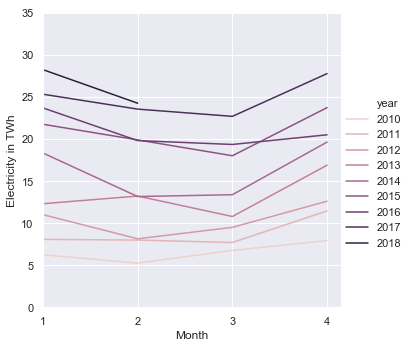

In [15]:
ax = sns.relplot(x="quarter", y="generated_renewable", hue="year", kind="line", data=prod_input, legend="full")
ax.set(xlabel='Month', ylabel='Electricity in TWh')
plt.ylim(0, 35)
plt.xlim(1, None)
plt.xticks(range(1, 5))

# Compare production - demand data
The production and demand data have been compared by taking into account measurements from 2017. While for consumption has been possible to analyse the values month by month, the production data available are split by quarter thus, the value for a month has been obtained by dividing the quarter by 3. The first insight is that for every month the consumption is covered for at least 30% by renewable sources. October is the month where renewable energy production performs better, there it reaches almost 40%. The worst performance, on the other hand, is observed in January with just 30%.

In [14]:
cons_2017 = cons_m_input[cons_m_input.year == 2017][['month', 'pds_setc_total']].rename(columns={"pds_setc_total": "consumption"})
cons_2017['quarter'] = pd.to_numeric(np.ceil(cons_2017['month'] / 3), downcast='integer')

prod_2017 = prod_filtered[prod_filtered.year == 2017][['quarter', 'generated_renewable']].rename(columns={"generated_renewable": "production"})
prod_2017['production'] = prod_2017['production'] / 3

tot_2017 = cons_2017.set_index('quarter').join(prod_2017.set_index('quarter'))
tot_2017['quarter'] = tot_2017.index
tot_2017_melt = pd.melt(tot_2017, id_vars=["quarter", "month"], var_name="type", value_name="value")

([<matplotlib.axis.XTick at 0x1a1ec3e5f8>,
 <a list of 12 Text xticklabel objects>)

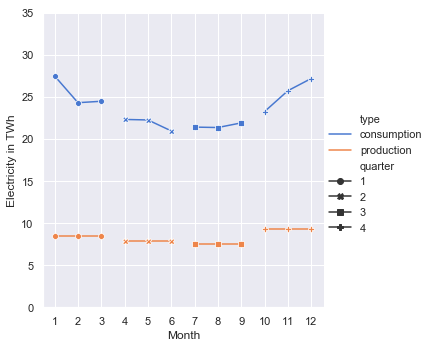

In [17]:
ax = sns.relplot(x="month", y="value", hue="type", style="quarter", kind="line", dashes=False, markers=True, data=tot_2017_melt, palette="muted")
ax.set(xlabel='Month', ylabel='Electricity in TWh')
plt.ylim(0, 35)
plt.xlim(0.5, None)
plt.xticks(range(1, 13))

In [15]:
tot_2017['percentage'] = (tot_2017['production'] / tot_2017['consumption']) * 100
tot_2017[['quarter', 'month', 'consumption', 'production', 'percentage']]

,quarter,month,consumption,production,percentage
quarter,,,,,
1,1,1,27.48,8.440000,30.713246
1,1,2,24.31,8.440000,34.718223
1,1,3,24.48,8.440000,34.477124
2,2,4,22.32,7.850000,35.170251
2,2,5,22.26,7.850000,35.265049
2,2,6,20.96,7.850000,37.452290
3,3,7,21.41,7.563333,35.326172
3,3,8,21.36,7.563333,35.408864
3,3,9,21.91,7.563333,34.520006


# Analyse the losses trend
The losses data represents the difference between the amount of electricity produced and what is really used. This is often connected with a leak during the transmission of electricity from the production sites to the final users. The data shows that this is generally correlated to the amount of electricity used, meaning that the more is transferred the more is lost. What is interesting to observe, by the way, is that there has not been a reduction of this phenomenon in the last years. While this amount is small compared to the full production, a reduction of this waste could convert in general decrease of costs of electricity, perhaps by producing renewable energy closer to the consumption sites.

([<matplotlib.axis.XTick at 0x1a1eec8198>,
 <a list of 12 Text xticklabel objects>)

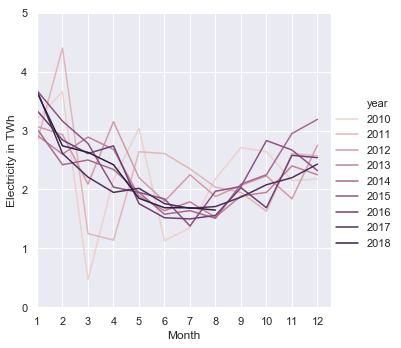

In [19]:
ax = sns.relplot(x="month", y="pds_transmission_distribution_and_other_losses1", hue="year", kind="line", data=cons_m_input, legend="full")
ax.set(xlabel='Month', ylabel='Electricity in TWh')
plt.ylim(0, 5)
plt.xlim(1, None)
plt.xticks(range(1, 13))